In [1]:
# This notebook plays with the MNIST digits dataset, for which I use the
# parser https://pypi.org/project/python-mnist/
# and the official data source http://www.itl.nist.gov/iaui/vip/cs_links/EMNIST/gzip.zip
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# This requires the python-mnist package and the MNIST data
# which can be found at https://github.com/sorki/python-mnist

from mnist import MNIST
mndata = MNIST('/Users/wltrimbl/git/python-mnist/data')
images, labels = mndata.load_training()
testX, testY = mndata.load_testing()

In [3]:
digits = np.array(images)

In [4]:
digits.shape

(60000, 784)

In [5]:
p = np.reshape(digits, newshape=( 60000, 28,28))

In [6]:
p.shape

(60000, 28, 28)

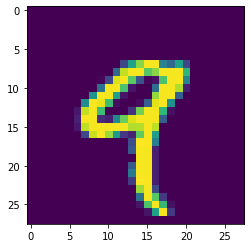

In [7]:
plt.imshow(p[4,::])

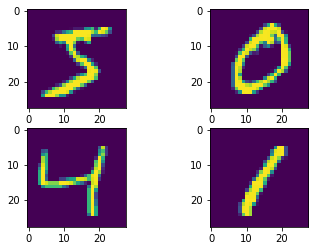

In [8]:
plt.subplot(221)
plt.imshow(p[0,::])
plt.subplot(222)
plt.imshow(p[1,::])
plt.subplot(223)
plt.imshow(p[2,::])
plt.subplot(224)
plt.imshow(p[3,::])
plt.savefig("MNIST.png", dpi=300, bbox_inches="tight")

In [9]:
ones = np.where(np.array(labels)==8)

In [10]:
ones[0]

array([   17,    31,    41, ..., 59989, 59995, 59999])

In [17]:
images[ones[0]]

TypeError: only integer scalar arrays can be converted to a scalar index

In [18]:
labels[0:100]

array('B', [5, 0, 4, 1, 9, 2, 1, 3, 1, 4, 3, 5, 3, 6, 1, 7, 2, 8, 6, 9, 4, 0, 9, 1, 1, 2, 4, 3, 2, 7, 3, 8, 6, 9, 0, 5, 6, 0, 7, 6, 1, 8, 7, 9, 3, 9, 8, 5, 9, 3, 3, 0, 7, 4, 9, 8, 0, 9, 4, 1, 4, 4, 6, 0, 4, 5, 6, 1, 0, 0, 1, 7, 1, 6, 3, 0, 2, 1, 1, 7, 9, 0, 2, 6, 7, 8, 3, 9, 0, 4, 6, 7, 4, 6, 8, 0, 7, 8, 3, 1])

In [19]:
sample = digits[0:1000,:]

Text(33.0, 0.5, 'samples')

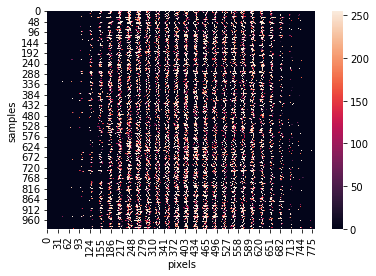

In [20]:
import seaborn as sb
sb.heatmap(sample)
plt.xlabel("pixels")
plt.ylabel("samples")

/Users/Shared/anaconda3/lib/python3.9/site-packages/seaborn/matrix.py:654: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


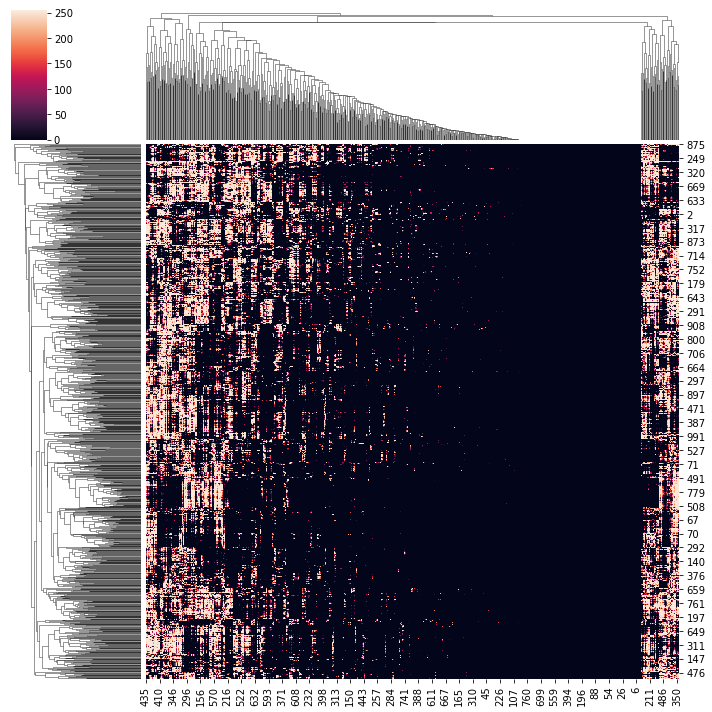

In [21]:
# Wait, this isn't quite what I want.  I want to reorder columns (pixel positions) and rows (sample digits).
sb.clustermap(sample)


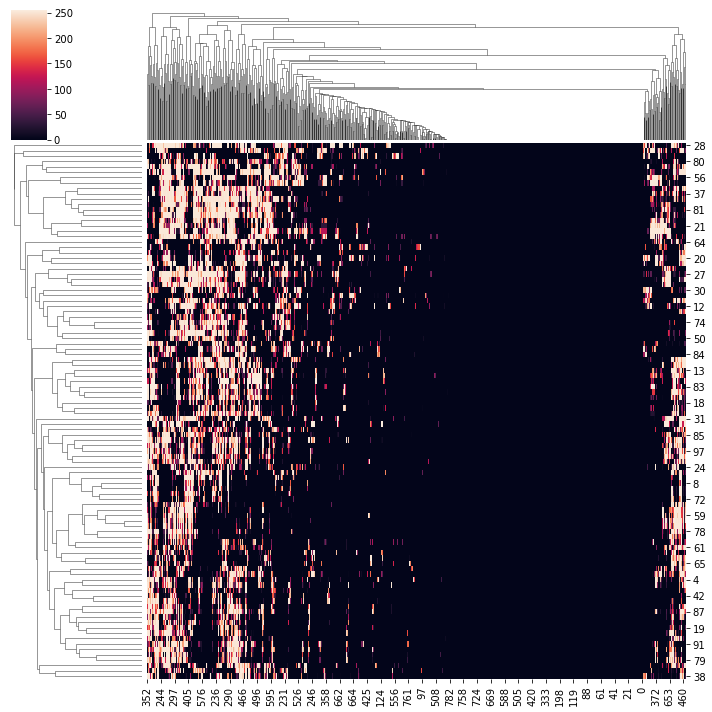

In [22]:
# A little busy, maybe only look at 100 samples?
sb.clustermap(sample[0:100,:])

In [23]:
sb.clustermap(sample[0:100,:], row_colors=labels[0:100])

TypeError: 'int' object is not iterable

<Figure size 720x720 with 0 Axes>

In [24]:
# sb.clustermap wants a list of color names for row_colors.  Fine.  

h = {0: "black", 1:"brown", 2:"red", 3:"orange", 4:"yellow",
    5:"green", 6:"blue", 7:"purple", 8:"grey", 9:"white"}
colorlabels100 = []
for l in labels[0:100]:
    colorlabels100.append(h[l])
colorlabels100

['green',
 'black',
 'yellow',
 'brown',
 'white',
 'red',
 'brown',
 'orange',
 'brown',
 'yellow',
 'orange',
 'green',
 'orange',
 'blue',
 'brown',
 'purple',
 'red',
 'grey',
 'blue',
 'white',
 'yellow',
 'black',
 'white',
 'brown',
 'brown',
 'red',
 'yellow',
 'orange',
 'red',
 'purple',
 'orange',
 'grey',
 'blue',
 'white',
 'black',
 'green',
 'blue',
 'black',
 'purple',
 'blue',
 'brown',
 'grey',
 'purple',
 'white',
 'orange',
 'white',
 'grey',
 'green',
 'white',
 'orange',
 'orange',
 'black',
 'purple',
 'yellow',
 'white',
 'grey',
 'black',
 'white',
 'yellow',
 'brown',
 'yellow',
 'yellow',
 'blue',
 'black',
 'yellow',
 'green',
 'blue',
 'brown',
 'black',
 'black',
 'brown',
 'purple',
 'brown',
 'blue',
 'orange',
 'black',
 'red',
 'brown',
 'brown',
 'purple',
 'white',
 'black',
 'red',
 'blue',
 'purple',
 'grey',
 'orange',
 'white',
 'black',
 'yellow',
 'blue',
 'purple',
 'yellow',
 'blue',
 'grey',
 'black',
 'purple',
 'grey',
 'orange',
 'brown']

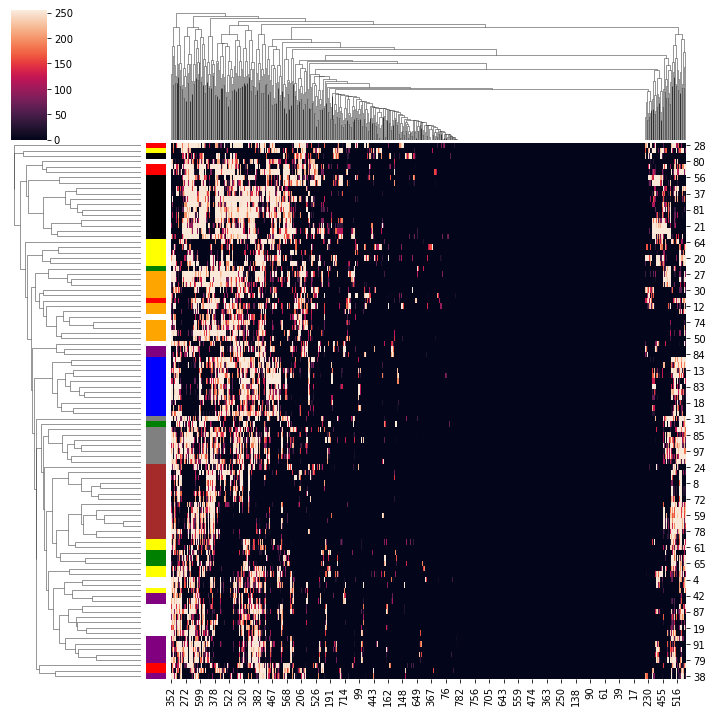

In [25]:
clustermap = sb.clustermap(sample[0:100,:], row_colors=colorlabels100)

In [26]:
# The clustermap library function gives me the data in attributes of the return value:
dir(clustermap)

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_figure',
 '_get_palette',
 '_legend_out',
 '_margin_titles',
 '_preprocess_colors',
 '_update_legend_data',
 'add_legend',
 'ax_cbar',
 'ax_col_colors',
 'ax_col_dendrogram',
 'ax_heatmap',
 'ax_row_colors',
 'ax_row_dendrogram',
 'cax',
 'cbar_pos',
 'col_color_labels',
 'col_colors',
 'color_list_to_matrix_and_cmap',
 'data',
 'data2d',
 'dendrogram_col',
 'dendrogram_row',
 'dim_ratios',
 'fig',
 'figure',
 'format_data',
 'gs',
 'legend',
 'mask',
 'plot',
 'plot_colors',
 'plot_dendrograms',
 'plot_matrix',
 'row_color_labels',
 'row_colors',
 'savefig',
 'set',
 'standard_scale',
 'tight_layout',
 'z_score']

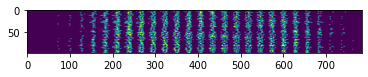

In [27]:
# There is data, which is what I gave it, 
plt.imshow(clustermap.data)

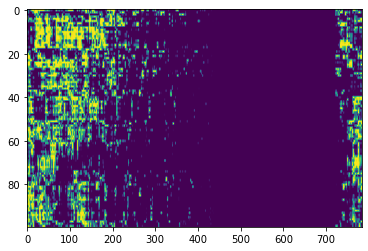

In [28]:
# And data2d, which has been reordered
plt.imshow(clustermap.data2d, aspect="auto")

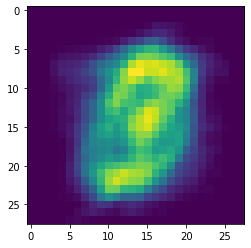

In [29]:
# I can plot what all the digits look like on top of each other
plt.imshow(np.array(clustermap.data.sum(axis=0)).reshape( (28,28)))

In [30]:
# And it turns out the indexes for the row- and column- reordering are buried in ax_col_dendrogram:
dir(clustermap.ax_col_dendrogram)

['ArtistList',
 '_PROPERTIES_EXCLUDED_FROM_SET',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_add_text',
 '_adjustable',
 '_agg_filter',
 '_alias_map',
 '_alpha',
 '_anchor',
 '_animated',
 '_aspect',
 '_autoscaleXon',
 '_autoscaleYon',
 '_autotitlepos',
 '_axes',
 '_axes_class',
 '_axes_locator',
 '_axis_names',
 '_axisbelow',
 '_box_aspect',
 '_callbacks',
 '_check_no_units',
 '_children',
 '_clipon',
 '_clippath',
 '_cm_set',
 '_colorbars',
 '_convert_dx',
 '_current_image',
 '_default_contains',
 '_deprecate_noninstance',
 '_facecolor',
 '_fill_between_x_or_y',
 '_frameon',
 '_gci',
 '_gen_axes_patch',
 '_gen_axes_spines',
 '_

In [31]:
# To get the reordering of the rows and columns,
# https://github.com/mwaskom/seaborn/issues/1207
# I need clustermap.dendrogram_row.reordered_ind
clustermap.dendrogram_row.reordered_ind [ 0:20]

[28, 60, 68, 80, 25, 82, 56, 88, 34, 37, 69, 75, 81, 95, 1, 21, 51, 63, 64, 2]

In [32]:
clustermap.dendrogram_col.reordered_ind[0:10]

[352, 325, 353, 436, 435, 407, 380, 408, 547, 574]

In [33]:
digits.shape

(60000, 784)

In [34]:
# So let's get some pieces of this clustergram and plot them on a 28x28 pixel grid:
middlepixels = clustermap.dendrogram_col.reordered_ind[300:600]
endpixels = clustermap.dendrogram_col.reordered_ind[723:]

In [35]:
middle_image = np.zeros((28,28))
end_image = np.zeros((28,28))

In [36]:
middle_image.reshape((784,))[middlepixels] = 1
end_image.reshape((784,))[endpixels] = 1

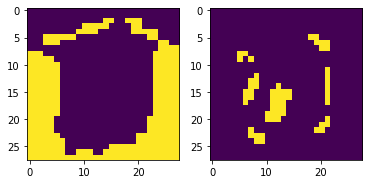

In [37]:
# These are the pixels that were clustered
plt.subplot(121)
plt.imshow(middle_image)
plt.subplot(122)
plt.imshow(end_image)

In [38]:
# Asking clustermap to compare my rows and columns...
# Let us try PCA, linear-algebra-only dimension reduction approach.

from sklearn.decomposition import PCA
pca=PCA(n_components=30)
pca.fit(sample.T)

PCA(n_components=30)

In [39]:
pca.components_.shape

(30, 1000)

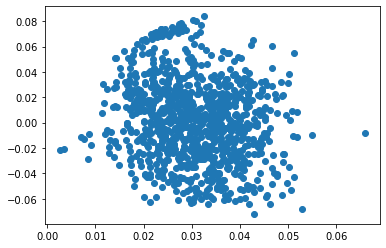

In [40]:
plt.scatter(pca.components_[0,:], pca.components_[1,:])

ValueError: 'c' argument has 100 elements, which is inconsistent with 'x' and 'y' with size 1000.

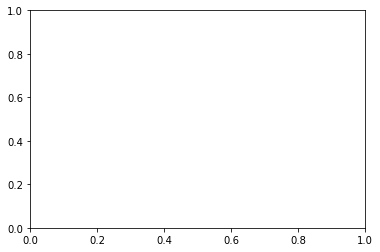

In [41]:
plt.scatter(pca.components_[0,:], pca.components_[1,:], color=colorlabels100)

In [42]:
# This is a sample of 1000 points. 
h = {0: "black", 1:"brown", 2:"red", 3:"orange", 4:"yellow",
    5:"green", 6:"blue", 7:"purple", 8:"grey", 9:"white"}
colorlabels1k = []
for l in labels[0:1000]:
    colorlabels1k.append(h[l])
colorlabels1k[0:50]

colorlabelsall = []
for l in labels:
    colorlabelsall.append(h[l])
colorlabelsall[0:50]

['green',
 'black',
 'yellow',
 'brown',
 'white',
 'red',
 'brown',
 'orange',
 'brown',
 'yellow',
 'orange',
 'green',
 'orange',
 'blue',
 'brown',
 'purple',
 'red',
 'grey',
 'blue',
 'white',
 'yellow',
 'black',
 'white',
 'brown',
 'brown',
 'red',
 'yellow',
 'orange',
 'red',
 'purple',
 'orange',
 'grey',
 'blue',
 'white',
 'black',
 'green',
 'blue',
 'black',
 'purple',
 'blue',
 'brown',
 'grey',
 'purple',
 'white',
 'orange',
 'white',
 'grey',
 'green',
 'white',
 'orange']

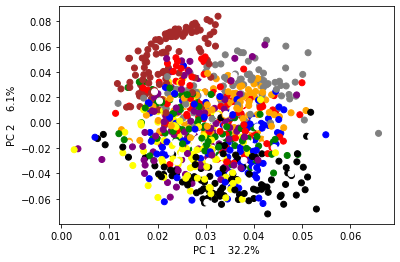

In [43]:
plt.scatter(pca.components_[0,:], pca.components_[1,:], color=colorlabels1k)
plt.xlabel("PC 1    "+"{:.1f}".format(pca.explained_variance_ratio_[0] * 100) + "%"); 
plt.ylabel("PC 2    "+"{:.1f}".format(pca.explained_variance_ratio_[1] * 100) + "%"); 

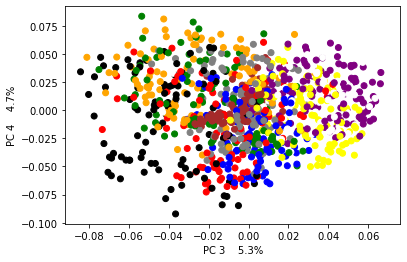

In [44]:
plt.scatter(pca.components_[2,:], pca.components_[3,:], color=colorlabels1k)
plt.xlabel("PC 3    "+"{:.1f}".format(pca.explained_variance_ratio_[2] * 100) + "%"); 
plt.ylabel("PC 4    "+"{:.1f}".format(pca.explained_variance_ratio_[3] * 100) + "%"); 

In [ ]:
# A little disappointing, 1000 digits fed into PCA and plotted. 
# Let us try TSNE on this 1000 sample by 30-dimensional PCA

In [45]:
from sklearn.manifold import TSNE
X_embedded = TSNE(n_components=2, learning_rate=.1, init='random').fit(pca.components_.T)

In [46]:
X_embedded

TSNE(init='random', learning_rate=0.1)

In [47]:
dir(X_embedded)

['_EXPLORATION_N_ITER',
 '_N_ITER_CHECK',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_check_feature_names',
 '_check_n_features',
 '_fit',
 '_get_param_names',
 '_get_tags',
 '_init',
 '_learning_rate',
 '_more_tags',
 '_repr_html_',
 '_repr_html_inner',
 '_repr_mimebundle_',
 '_tsne',
 '_validate_data',
 'angle',
 'early_exaggeration',
 'embedding_',
 'fit',
 'fit_transform',
 'get_params',
 'init',
 'kl_divergence_',
 'learning_rate',
 'method',
 'metric',
 'min_grad_norm',
 'n_components',
 'n_features_in_',
 'n_iter',
 'n_iter_',
 'n_iter_without_progress',
 'n_jobs',
 'perplexity',
 'random_state',
 'set_params',
 'square_di

In [48]:
X_embedded.embedding_.shape

(1000, 2)

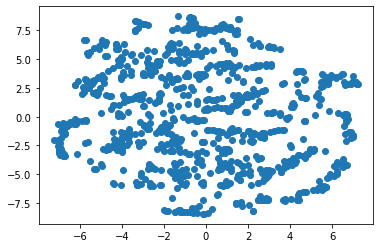

In [49]:
# We want to plot embedding_[:,1] against embedding_[:,0] 
plt.scatter(X_embedded.embedding_[:,0], X_embedded.embedding_[:,1])

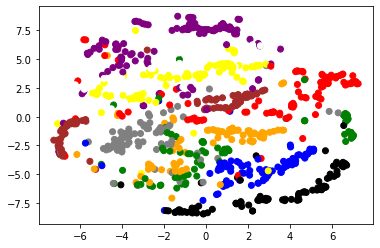

In [50]:
# And add label colors
plt.scatter(X_embedded.embedding_[:,0], X_embedded.embedding_[:,1], color=colorlabels1k)

In [ ]:
# This is a little more satisfying than [blind] PCA, but 
# less than perfect.  

In [51]:
# Fit 50-component PCA on all the data
pca50=PCA(n_components=50)
pca50.fit(digits.T)

PCA(n_components=50)

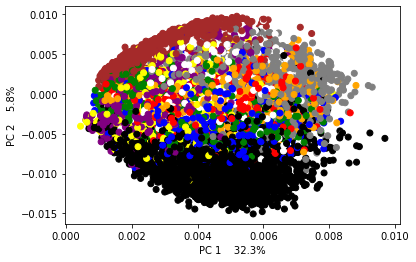

In [52]:
plt.scatter(pca50.components_[0,:], pca50.components_[1,:], color=colorlabelsall)
plt.xlabel("PC 1    "+"{:.1f}".format(pca50.explained_variance_ratio_[0] * 100) + "%"); 
plt.ylabel("PC 2    "+"{:.1f}".format(pca50.explained_variance_ratio_[1] * 100) + "%"); 

In [53]:
pca50.components_.shape

(50, 60000)

In [54]:
# Fit TSNE on subset of the big PCA output, but since TSNE takes too long for 10^{4} points, use only 
# 1000 samples
TSNE1K = TSNE(n_components=2, learning_rate=.1, init='random').fit(pca50.components_[:,0:1000].T)

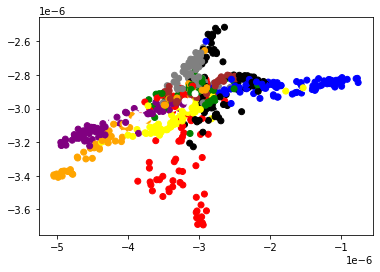

In [55]:
plt.scatter(TSNE1K.embedding_[:,0], TSNE1K.embedding_[:,1], color=colorlabelsall[0:1000])

In [56]:
TSNE4K = TSNE(n_components=2, learning_rate=.1, init='random').fit(pca50.components_[:,0:4000].T)

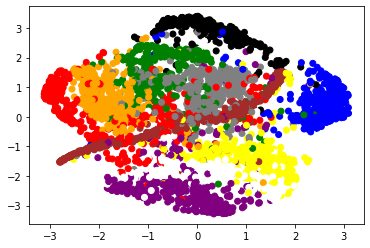

In [57]:
plt.scatter(TSNE4K.embedding_[:,0], TSNE4K.embedding_[:,1], color=colorlabelsall[0:4000])

In [ ]:
# Wait, this is qualitatively different from TSNE with n=1k 

# We can see that the TSNE procedure for drawing pretty 2d pictures that 
# reflect concentrations of point density in high dimensional spaces
# is sensitive to number of points and tuning parameters; 
# and be warned, it is not deterministic, so you don't get the
# same clouds each time you run it.  But it sure is pretty.

In [58]:
TSNE10K = TSNE(n_components=2, learning_rate=1.5, init="random").fit(pca50.components_[:,0:10000].T)

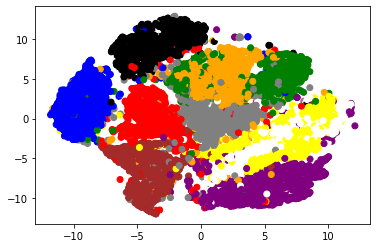

In [59]:
plt.scatter(TSNE10K.embedding_[:,0], TSNE10K.embedding_[:,1], color=colorlabelsall[0:10000])

In [60]:
digits

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

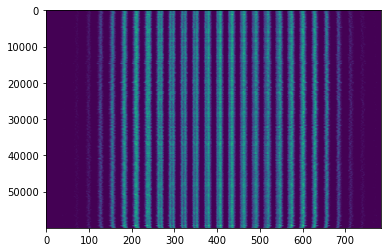

In [61]:
# The image of all the pixels flattened out is jumbled -- it is a mixture of the digits.
plt.imshow(digits, aspect="auto")

In [62]:
# I can sort by the labels, and show them grouped by digit.
digitsordered = digits[np.argsort(labels),:]
digits.shape

(60000, 784)

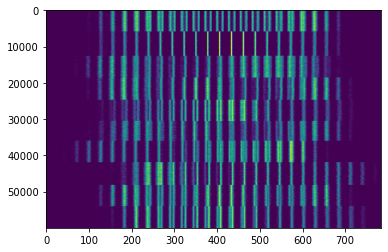

In [63]:
plt.imshow(digitsordered, aspect="auto")